In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

## READ IN MLB STATS FOR 1876-2018 SEASONS 

In [2]:
# read data from csv file for 2001-2018 MLB seasons
df = pd.read_csv('MLB_STATS_1876-2018_BP.csv')

In [3]:
df.head()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,22,0.54,0.4,2,14,0.237,1.498,33,1.0,1.0
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,77,0.74,1.1,7,39,0.557,1.323,46,3.0,3.0
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,51,1.76,0.8,4,52,0.788,1.075,3,8.0,9.0
3,CIN,13,24.5,3.66,65,2413,2372,238,555,51,...,60,1.76,0.9,0,9,0.138,1.496,28,0.0,0.0
4,HAR,12,26.3,6.22,69,2703,2664,429,711,96,...,114,4.22,1.6,0,47,0.691,0.957,15,11.0,11.0


In [4]:
df.shape

(2815, 65)

In [5]:
df.tail()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
2810,STL,49,28.0,4.69,162,6200,5498,759,1369,248,...,1337,2.25,8.3,43,88,0.543,1.338,63,1.0,8.0
2811,TBR,54,27.1,4.42,162,6195,5475,716,1415,274,...,1421,2.84,8.8,52,90,0.556,1.199,55,0.0,14.0
2812,TEX,50,27.4,4.55,162,6163,5453,737,1308,266,...,1121,2.28,7.1,42,67,0.414,1.403,57,0.0,5.0
2813,TOR,63,28.9,4.38,162,6076,5477,709,1336,320,...,1298,2.36,8.1,39,73,0.451,1.414,71,0.0,3.0
2814,WSN,53,27.6,4.76,162,6288,5517,771,1402,284,...,1417,2.91,8.8,40,82,0.506,1.250,42,1.0,7.0


In [6]:
df.dtypes

Tm         object
#Bat        int64
BatAge    float64
R/G       float64
G_x         int64
           ...   
W-L%      float64
WHIP      float64
WP          int64
cSho      float64
tSho      float64
Length: 65, dtype: object

In [7]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

1884    33
2017    30
2015    30
1998    30
2002    30
        ..
1879     8
1880     8
1876     8
1877     6
1878     6
Name: Year, Length: 142, dtype: int64

In [9]:
correlation = df.corr()

In [10]:
W_corr = correlation.W
W_corr

#Bat      0.178940
BatAge    0.352487
R/G       0.224332
G_x       0.582830
PA        0.629993
            ...   
W-L%      0.819723
WHIP     -0.336374
WP       -0.107353
cSho      0.272929
tSho      0.508369
Name: W, Length: 64, dtype: float64

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

Tm        0
#Bat      0
BatAge    0
R/G       0
G_x       0
         ..
W-L%      0
WHIP      0
WP        0
cSho      8
tSho      8
Length: 65, dtype: int64

In [12]:
my_nulls = df.isnull().any()
my_nulls

Tm        False
#Bat      False
BatAge    False
R/G       False
G_x       False
          ...  
W-L%      False
WHIP      False
WP        False
cSho       True
tSho       True
Length: 65, dtype: bool

In [13]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [14]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [15]:
df.shape

(2815, 65)

In [16]:
df.W.describe()

count    2815.000000
mean       75.858970
std        16.007805
min         2.000000
25%        67.000000
50%        77.000000
75%        87.000000
max       116.000000
Name: W, dtype: float64

## Optimized Set Of Predictors Based On Step Backwards Feature Selection

In [17]:
preds = ['G_x', 'PA', 'R_x', 'H_x', '2B',
               '3B', 'HR_x', 'SB', 'OBP', 'OPS','SH', 'SF', 'IBB_x', 'LOB_x',
               'BB_y', 'BF', 'BK', 'CG','GF', 'H_y', 'H9', 'HR_y', 'IBB_y',
               'IP', 'LOB_y', 'RA/G', 'SO_y', 'SO9', 'SV',
               'WHIP', 'WP', 'cSho', 'tSho']

print(len(preds))

33


In [18]:
df_fil = df.dropna()
df_fil.shape

(1618, 65)

In [19]:
# create training and testing data
y = df_fil.W
X = df_fil[preds]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1294, 33) (1294,)
(324, 33) (324,)


## OLS Model with 33 features

In [20]:
# fit a model
lm_op = LinearRegression()
model_op = lm_op.fit(X_train, y_train)
predictions = lm_op.predict(X_test)

In [21]:
print("The Trainng Score For Model:")
print(model_op.score(X_train,y_train))
print()
print("The Test Score For Model :")
print(model_op.score(X_test,y_test))
print()

The Trainng Score For Model:
0.97648089836

The Test Score For Model :
0.976502399831



In [22]:
pred_tr = model_op.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model With '+ str(len(preds)) +' Regressor-Predictors:')
print("Root Mean Squared Error Train(RMSE) for training data: {}".format(rmse_train))

print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error(RMSE) for test data: {}".format(rmse_test))

print()

For Linear Regression Model With 33 Regressor-Predictors:
Root Mean Squared Error Train(RMSE) for training data: 1.9097134537195484

Root Mean Squared Error(RMSE) for test data: 1.904363397097704



In [23]:
for item in zip(preds,model_op.coef_):
    print(item)
    print()

('G_x', -1.3850002215176427)

('PA', -0.2635458880947788)

('R_x', 0.28863132471876368)

('H_x', -0.024519722599795835)

('2B', -0.045999196374585744)

('3B', -0.094289520069022026)

('HR_x', -0.12240205208738039)

('SB', 0.0032089802977201898)

('OBP', -304.44676783697668)

('OPS', 226.42592798273262)

('SH', -0.010897619229607787)

('SF', -0.022106258723458141)

('IBB_x', 0.0079846711329483282)

('LOB_x', 0.27474669255477868)

('BB_y', -0.040670797439243934)

('BF', 0.058028361300296316)

('BK', -0.013449261232557089)

('CG', 1.5572707098801533)

('GF', 1.5323951027959226)

('H_y', -0.019172676978202321)

('H9', -3.5447551328087679)

('HR_y', -0.0072375497436878971)

('IBB_y', -0.0047867927090218887)

('IP', 0.67922505794814925)

('LOB_y', -0.061066188825543058)

('RA/G', -10.800999615487362)

('SO_y', 0.015001906253662602)

('SO9', -2.2555344792256737)

('SV', 0.066848670201793636)

('WHIP', 57.867042480206358)

('WP', -0.0086290022269243354)

('cSho', -0.05126002771731912)

('tSho'

In [24]:
################################################################################################################

## LASSO with 33 Predictors/Regressors

## This is an attept to determine which regressors are most important for predicting wins using the LASSO method.

In [25]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_test,y_test))
coef = pd.Series(reg.coef_, index = preds)

Best alpha using built-in LassoCV: 2.329571
Best score using built-in LassoCV: 0.958007


/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.11650939626998, tolerance: 13.046297099767983
  tol, rng, random, positive)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429.3471861492544, tolerance: 13.046297099767983
  tol, rng, random, positive)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not c

In [26]:
print("Lasso selected " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso selected 15 variables and eliminated the other 18 variables


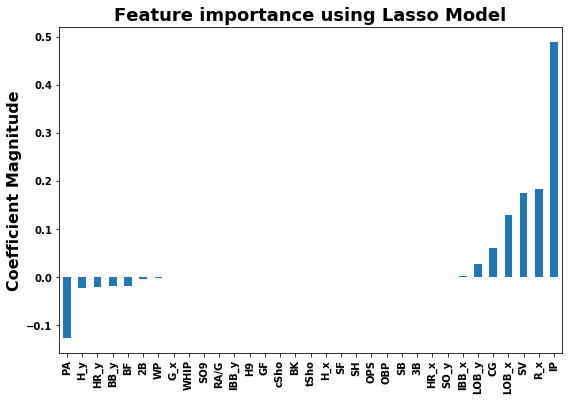

In [27]:
imp_coef = coef.sort_values()
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
plt.figure(figsize = [9,6])
imp_coef.plot(kind = "bar")
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.ylabel('Coefficient Magnitude', weight = 'bold', size=16)
plt.title("Feature importance using Lasso Model",weight = 'bold',size =18)

In [28]:
# print LASSO regression coefficients
coef

G_x      0.000000
PA      -0.126490
R_x      0.184043
H_x      0.000000
2B      -0.003098
3B      -0.000000
HR_x     0.000000
SB       0.000000
OBP      0.000000
OPS      0.000000
SH       0.000000
SF       0.000000
IBB_x    0.002727
LOB_x    0.128585
BB_y    -0.018697
BF      -0.018613
BK      -0.000000
CG       0.061621
GF      -0.000000
H_y     -0.022946
H9      -0.000000
HR_y    -0.020200
IBB_y   -0.000000
IP       0.489765
LOB_y    0.026645
RA/G    -0.000000
SO_y     0.000834
SO9      0.000000
SV       0.175806
WHIP    -0.000000
WP      -0.001137
cSho     0.000000
tSho     0.000000
dtype: float64

## OLS Model Using Regressors Chosen By LASSO Above

## Note  RA/G as predictor was included along with the 15 predictors chosen by LASSO because RMSE was lower with 16 regressors than with only 15.

In [29]:
# Create another OLS model using regressors considered significant by LASSO analysis

preds2 = ['PA', 'R_x', '2B','LOB_x','BB_y', 'BF', 'CG','H_y', 'H9', 'HR_y',
          'IP', 'LOB_y', 'SO_y', 'SV', 'WHIP','RA/G']

print(len(preds2))

16


In [30]:
# create training and testing data
y = df_fil.W
X = df_fil[preds2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1294, 16) (1294,)
(324, 16) (324,)


In [31]:
# fit a model
lm_2 = LinearRegression()
model_op2 = lm_2.fit(X_train, y_train)
predictions = lm_2.predict(X_test)

In [32]:
print("The Training Score For Model:")
print(model_op2.score(X_train,y_train))
print()
print("The Test Score For Model :")
print(model_op2.score(X_test,y_test))
print()

The Training Score For Model:
0.97475027622

The Test Score For Model :
0.976565829176



In [33]:
pred_train = model_op2.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
print('For Scikit Learn Linear Regression Model With '+ str(len(preds2)) +' Regressor-Predictors:')
print("Root Mean Squared Error Train(RMSE) for training data: {}".format(rmse_train))

print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error(RMSE) for test data: {}".format(rmse_test))

print()

For Scikit Learn Linear Regression Model With 16 Regressor-Predictors:
Root Mean Squared Error Train(RMSE) for training data: 1.9787282717099435

Root Mean Squared Error(RMSE) for test data: 1.9017913439913379



In [34]:
resid = y_test - predictions

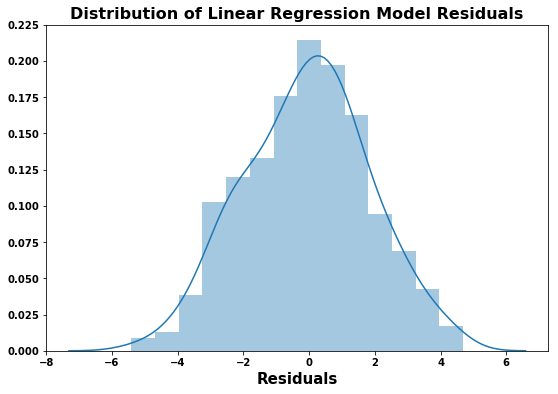

In [35]:
plt.figure(figsize = [9,6])
sns.distplot(resid)
plt.xlabel('Residuals', weight = 'bold',size =15)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.title("Distribution of Linear Regression Model Residuals",weight = 'bold',size =16)

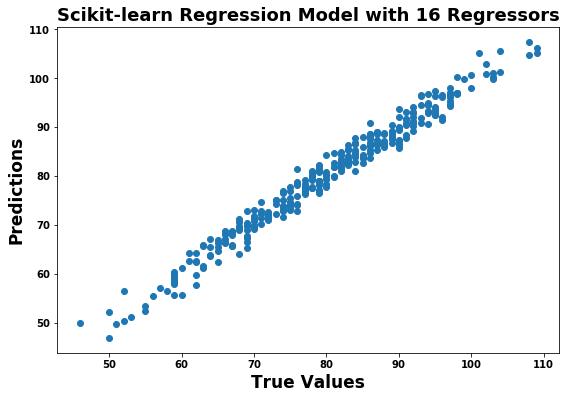

In [36]:
plt.figure(figsize = [9,6])
plt.scatter(y_test, predictions)
plt.title("Scikit-learn Regression Model with 16 Regressors",weight = 'bold',size =18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.xlabel('True Values',weight = 'bold',size =17)
plt.ylabel('Predictions',weight = 'bold',size =17)
plt.savefig('LASSO_Optimized_OLS_ModelPredictions.png')

In [37]:
#features = ['TB','PA', 'R_x', '2B','IBB_x', 'LOB_x','BB_y', 'BF', 'CG','H_x','H_y', 'H9', 'HR_y',
            #'IP', 'LOB_y', 'SO_y', 'SV', 'WP','WHIP','RA/G','W']
features = ['W','PA', 'R_x', '2B','LOB_x','BB_y', 'BF', 'CG','H_y', 'H9', 'HR_y',
          'IP', 'LOB_y', 'SO_y', 'SV', 'WHIP','RA/G']


data = df_fil[features]

In [38]:
print(data.corr())

              W        PA       R_x        2B     LOB_x      BB_y        BF  \
W      1.000000  0.481000  0.604954  0.310653  0.444813 -0.199600  0.241275   
PA     0.481000  1.000000  0.613428  0.487318  0.871577  0.388749  0.945251   
R_x    0.604954  0.613428  1.000000  0.694054  0.540726  0.194353  0.468112   
2B     0.310653  0.487318  0.694054  1.000000  0.403360  0.138302  0.422743   
LOB_x  0.444813  0.871577  0.540726  0.403360  1.000000  0.343575  0.755633   
BB_y  -0.199600  0.388749  0.194353  0.138302  0.343575  1.000000  0.545499   
BF     0.241275  0.945251  0.468112  0.422743  0.755633  0.545499  1.000000   
CG     0.109926 -0.037201 -0.220648 -0.582325  0.041777 -0.076898 -0.082031   
H_y   -0.066762  0.693812  0.467217  0.466160  0.549210  0.416001  0.807729   
H9    -0.480256  0.016927  0.222279  0.277833  0.010993  0.222380  0.177428   
HR_y  -0.082245  0.355645  0.499255  0.520174  0.199925  0.298893  0.415934   
IP     0.446583  0.956379  0.406880  0.342916  0.759

## Statsmodel OLS Regression Model with 16 Predictors/Regressors

In [39]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print('Statsmodel with ' + str(len(preds2)) +' Regressors')
print(results.summary())

Statsmodel with 16 Regressors
                                 OLS Regression Results                                
Dep. Variable:                      W   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.313e+05
Date:                Sat, 14 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:18:31   Log-Likelihood:                         -2721.8
No. Observations:                1294   AIC:                                      5476.
Df Residuals:                    1278   BIC:                                      5558.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [40]:
ypred_test = results.predict(X_test)
ypred_train = results.predict(X_train)
print(len(ypred_train))
print()
print(len(ypred_test))

1294

324


In [41]:
rmse_train = np.sqrt(mean_squared_error(y_train,ypred_train))
print('For Statsmodel Linear Regression Model With '+ str(len(preds2)) +' Regressor-Predictors:')
print("Root Mean Squared Error Train(RMSE) for training data: {}".format(rmse_train))

print()
rmse_test = np.sqrt(mean_squared_error(y_test,ypred_test))
print("Root Mean Squared Error(RMSE) for test data: {}".format(rmse_test))

print()

For Statsmodel Linear Regression Model With 16 Regressor-Predictors:
Root Mean Squared Error Train(RMSE) for training data: 1.9827560560402746

Root Mean Squared Error(RMSE) for test data: 1.9104043496052243

